In [1]:
from PLA.pla import PLA
from LogisticRegression.lr import LogisticRegression
from KNN.knn import KNNclassifier
from Adaboost.adaboost import MyAdaboost
from NaiveBayes.bayes import Bayes
from DecisionTree.cartdt import CartDT
from SVM.svm import SVM

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection  import train_test_split
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## 测试一 breast_cancer

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# 划分数据
X_train,X_test,y_train,y_test = train_test_split(X,y)
print(X_train.shape,X_test.shape)
y_train_neg = y_train.copy()
y_train_neg[y_train == 0] = -1
y_test_neg = y_test.copy()
y_test_neg[y_test == 0] = -1

(426, 30) (143, 30)


In [4]:
def create_clfs():
    clfs = {
        "pla":PLA(),
        "lr":LogisticRegression(),
        "knn":KNNclassifier(5),
        "bayes":Bayes(),
        "cartdt":CartDT(),
        "adaboost":MyAdaboost(100),
        "svm-linear":SVM(kind="linear"),
        "svm-gaussian":SVM(kind="gaussian")
    }
    return clfs

In [5]:
clfs = create_clfs()

In [ ]:
results = {"name":[],"train-score":[],"test-score":[]}
for name,clf in clfs.items():
    # logistic—regression 的 label 是 0和1，其余都是-1和1
    (train_y,test_y) = (y_train,y_test) if name in ["lr","bayes"] else (y_train_neg,y_test_neg)
    clf.fit(X_train,train_y)
    train_score = clf.score(X_train,train_y)
    test_score = clf.score(X_test,test_y)
    results["name"].append(name)
    results["train-score"].append(train_score)
    results["test-score"].append(test_score)
    print(f"{name}-{train_score:.2f}-{test_score:.2f}")

In [7]:
import pandas as pd
data = pd.DataFrame(results).set_index("name")
data

,train-score,test-score
name,,
pla,0.715962,0.713287
lr,0.892019,0.902098
knn,0.875587,0.804196
bayes,0.941315,0.937063
cartdt,1.000000,0.902098
adaboost,1.000000,0.965035
svm-linear,0.964789,0.930070
svm-gaussian,1.000000,0.601399


<AxesSubplot:xlabel='name'>

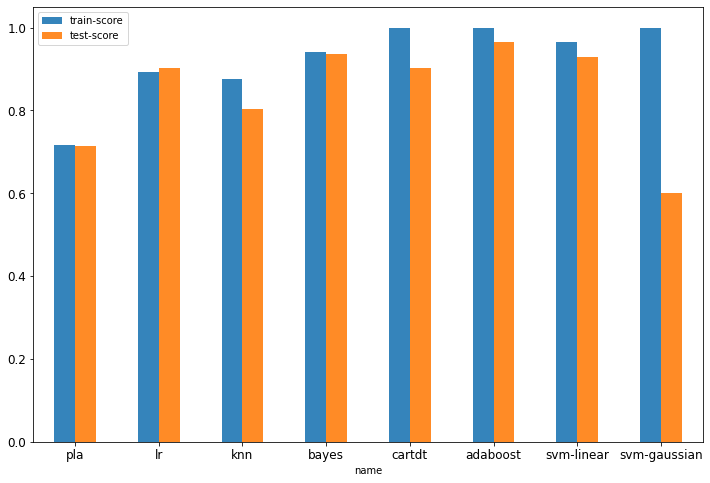

In [8]:
data.plot(kind="bar",figsize=(12,8),rot=0,alpha=0.9,fontsize=12)

## 测试二 二维数据直观输出

In [9]:
def subplot_clf(ax,X,y,cls,name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    points = np.c_[xx.ravel(), yy.ravel()]
    Z = cls.predict(points)
    cs = ax.contourf(xx, yy, Z.reshape(xx.shape))
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=y)
    ax.set_title(name)

In [10]:
def plot_clfs(clfs,X,y):
    clf_size = len(clfs)
    fig = plt.figure(figsize=(12,4*((clf_size+2)//2)),dpi=200)
    ax = fig.add_subplot((clf_size+2)//2,2,1)
    ax.scatter(X[:,0], X[:,1], marker='o', c=y)
    ax.set_title("origin")
    for i,name in enumerate(clfs):
        ax = fig.add_subplot((clf_size+1)//2,2,i+2)
        subplot_clf(ax,X,y,clfs[name],name)
    plt.show()

In [11]:
from sklearn.datasets import make_blobs
X,y = make_blobs(200,2,2,random_state=30)
y_neg = y.copy()
y_neg[y==0] = -1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 43.10it/s]


     pcost       dcost       gap    pres   dres
 0: -3.6881e+01 -3.6809e+02  2e+03  2e+00  1e-13
 1: -2.3637e+01 -1.9289e+02  3e+02  3e-01  7e-14
 2: -1.6572e+01 -4.3875e+01  4e+01  4e-02  4e-14
 3: -1.5002e+01 -2.6273e+01  2e+01  2e-02  3e-14
 4: -1.4120e+01 -1.8851e+01  7e+00  5e-03  3e-14
 5: -1.4013e+01 -1.4537e+01  6e-01  2e-04  3e-14
 6: -1.4139e+01 -1.4222e+01  1e-01  3e-05  3e-14
 7: -1.4165e+01 -1.4166e+01  1e-03  3e-07  3e-14
 8: -1.4165e+01 -1.4165e+01  1e-05  3e-09  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7053e+01 -3.7110e+02  2e+03  2e+00  5e-16
 1: -7.8383e+00 -1.8701e+02  2e+02  2e-02  7e-16
 2: -1.3936e+01 -4.1892e+01  3e+01  3e-03  6e-16
 3: -1.6949e+01 -2.3567e+01  7e+00  5e-04  4e-16
 4: -1.7850e+01 -1.9730e+01  2e+00  1e-04  3e-16
 5: -1.8165e+01 -1.8580e+01  4e-01  9e-06  3e-16
 6: -1.8255e+01 -1.8352e+01  1e-01  1e-06  3e-16
 7: -1.8261e+01 -1.8344e+01  8e-02  7e-07  3e-16
 8: -1.8283e+01 -1.8303e+01  2e-02  1e-07  3e-1

100%|████████████████████████████████████████████████████████████████████████| 210013/210013 [02:29<00:00, 1404.56it/s]


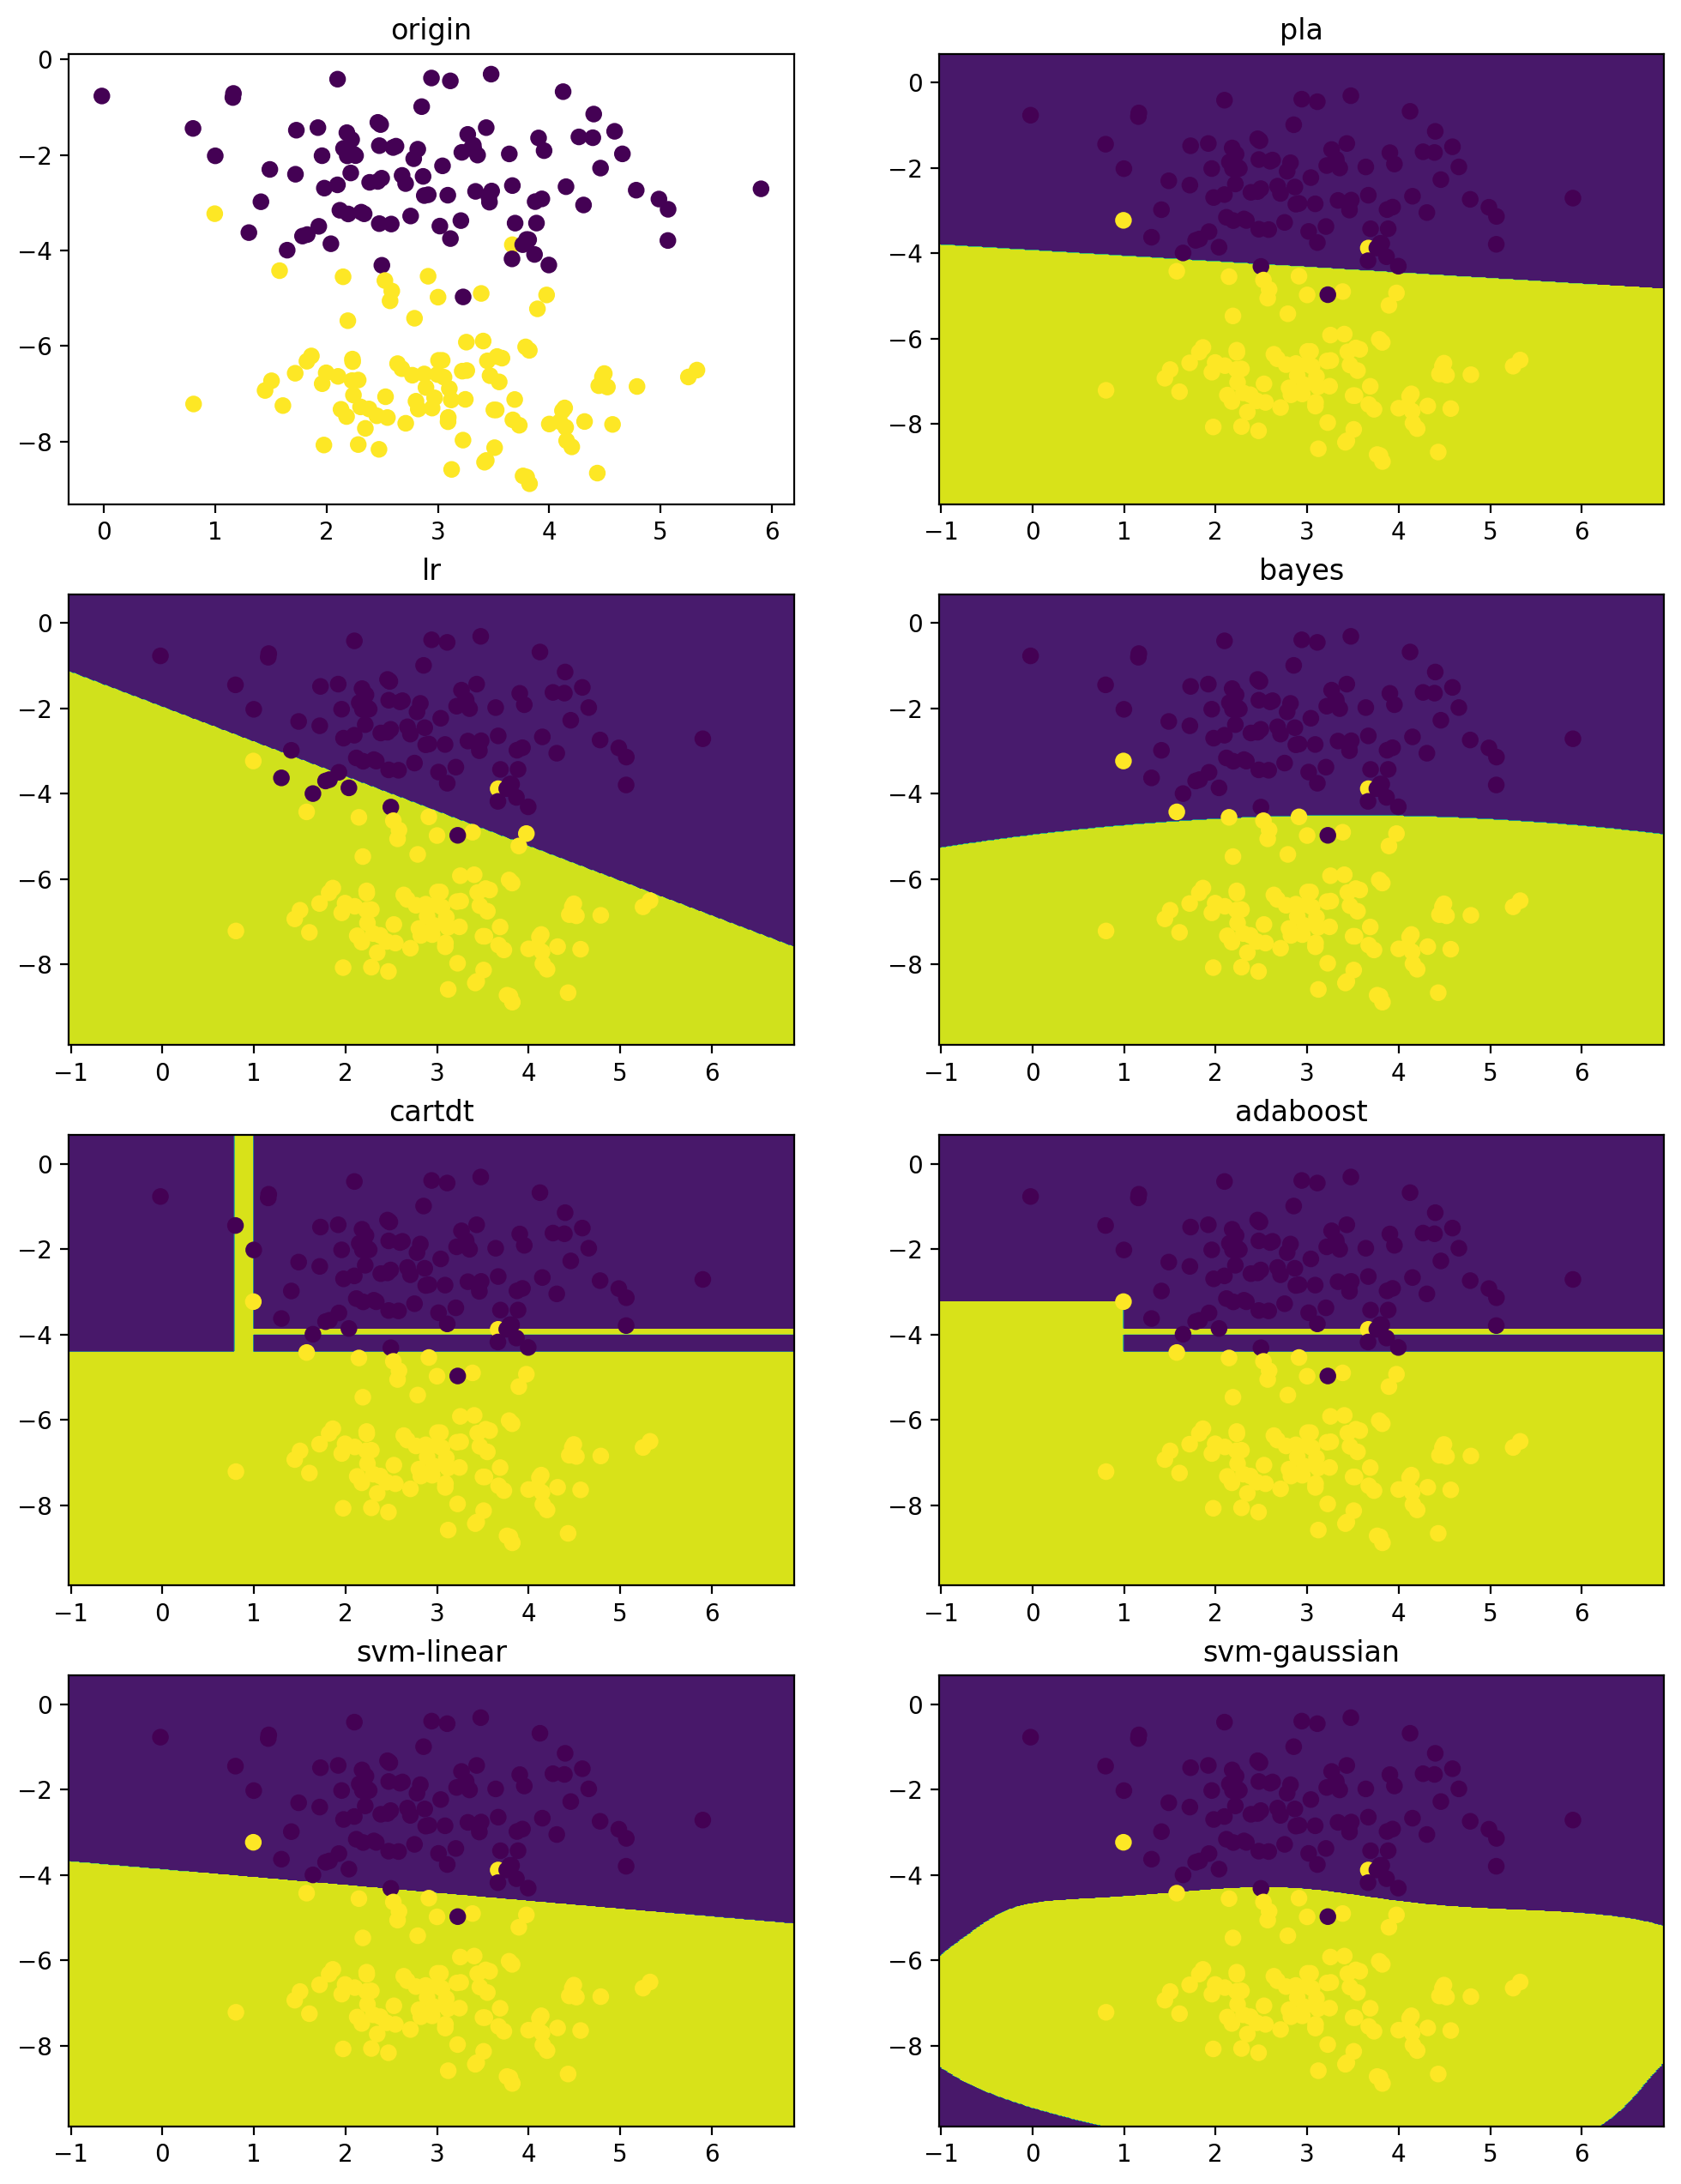

In [12]:
clfs = create_clfs()
clfs.pop("knn")
for name,clf in clfs.items():
    # logistic—regression 的 label 是 0和1，其余都是-1和1
    Y = y if name in ["lr","bayes"] else y_neg
    clf.fit(X,Y)
plot_clfs(clfs,X,y)

In [13]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, mean=[1,2],cov=2,random_state=222)
y_neg = y.copy()
y_neg[y==0] = -1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.77it/s]


     pcost       dcost       gap    pres   dres
 0: -1.9880e+02 -4.3091e+02  1e+03  2e+00  4e-14
 1: -1.5852e+02 -2.9234e+02  1e+02  1e-15  2e-14
 2: -1.8002e+02 -2.1800e+02  4e+01  1e-15  1e-14
 3: -1.8512e+02 -2.0210e+02  2e+01  1e-15  1e-14
 4: -1.8762e+02 -1.9736e+02  1e+01  1e-15  1e-14
 5: -1.8955e+02 -1.9390e+02  4e+00  1e-15  2e-14
 6: -1.9029e+02 -1.9263e+02  2e+00  2e-15  2e-14
 7: -1.9086e+02 -1.9168e+02  8e-01  2e-15  2e-14
 8: -1.9093e+02 -1.9157e+02  6e-01  4e-16  2e-14
 9: -1.9118e+02 -1.9125e+02  7e-02  1e-15  2e-14
10: -1.9121e+02 -1.9121e+02  3e-03  2e-15  2e-14
11: -1.9121e+02 -1.9121e+02  3e-05  5e-15  2e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8165e+01 -3.2524e+02  1e+03  2e+00  9e-16
 1: -2.5527e+01 -1.7422e+02  2e+02  1e-01  7e-16
 2: -3.0000e+01 -5.4289e+01  3e+01  2e-02  9e-16
 3: -3.6650e+01 -4.4526e+01  8e+00  4e-03  8e-16
 4: -3.9036e+01 -4.1210e+01  2e+00  9e-04  7e-16
 5: -3.9818e+01 -4.0253e+01  4e-01  4e-05  8e-1

100%|█████████████████████████████████████████████████████████████████████████| 222300/222300 [03:57<00:00, 937.61it/s]


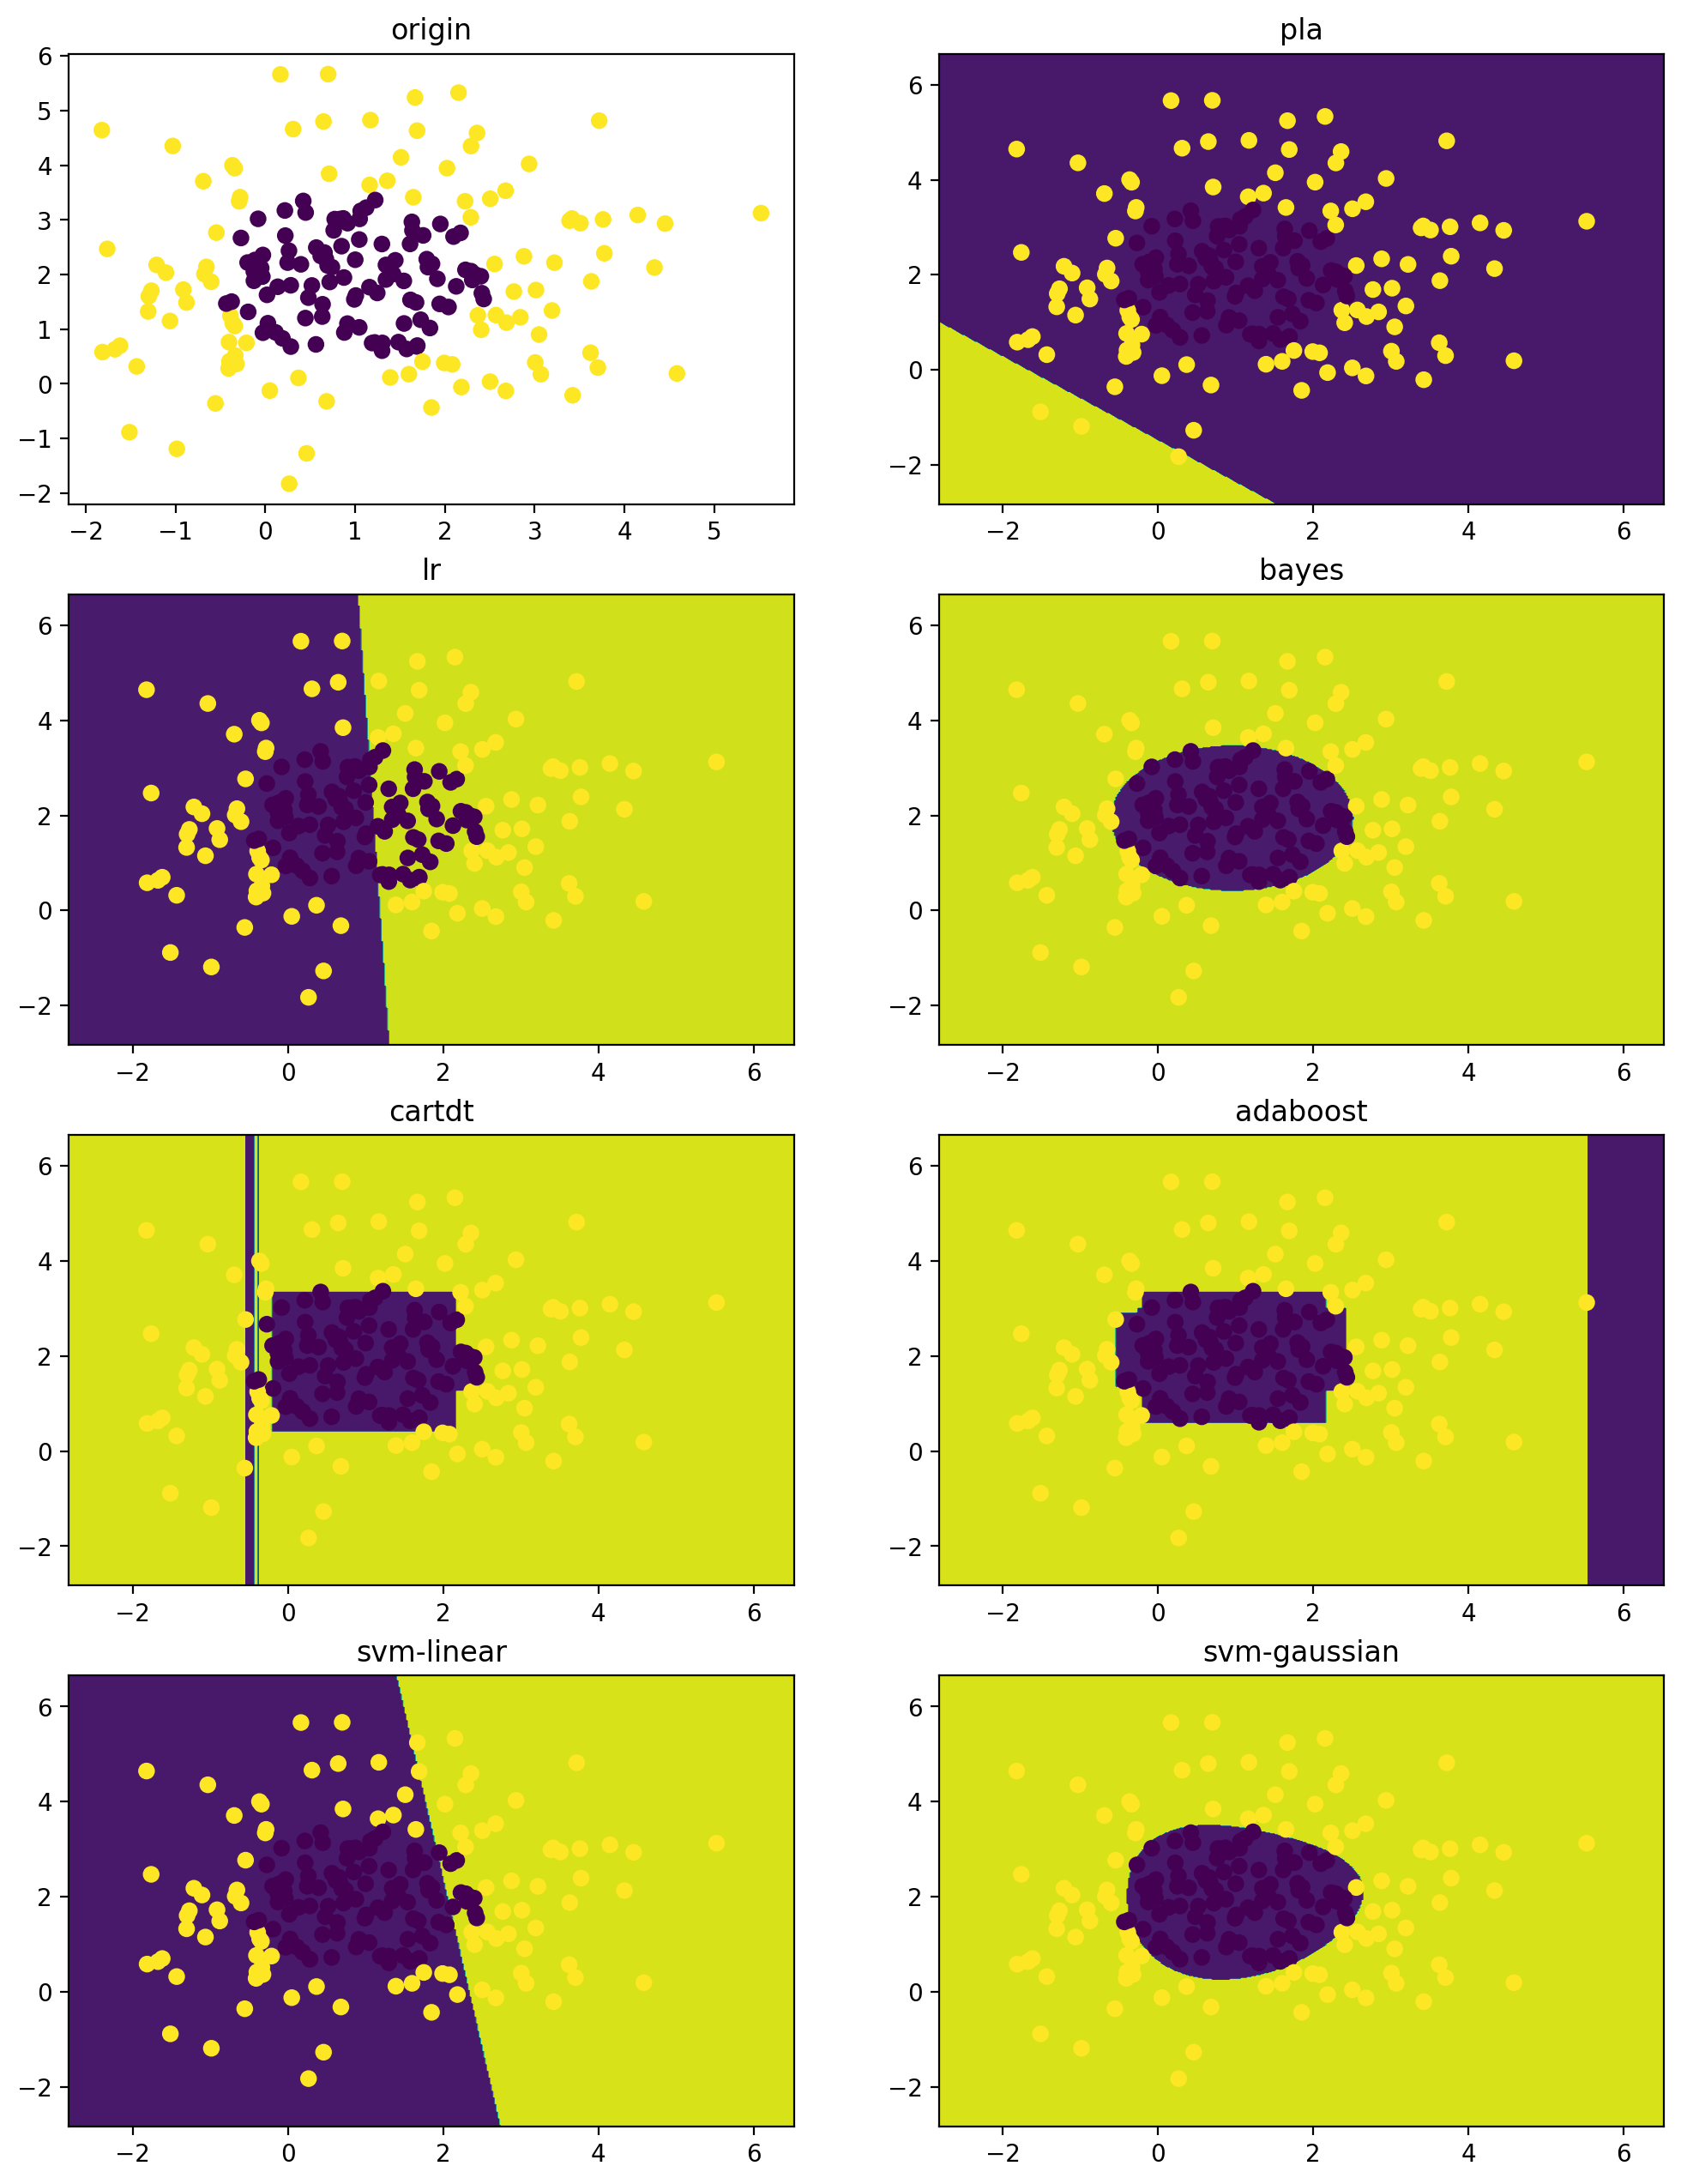

In [14]:
clfs = create_clfs()
clfs.pop("knn")
for name,clf in clfs.items():
    # logistic—regression 的 label 是 0和1，其余都是-1和1
    Y = y if name in ["lr","bayes"] else y_neg
    clf.fit(X,Y)
plot_clfs(clfs,X,y)